In [1]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt
import cv2
image=cv2.imread('../traf.bmp')

In [2]:
(B, G, R) = cv2.split(image)
cop=(B, G, R)
Bt=np.array([0,0,0] ,dtype=object)
Btsort=np.array([0,0,0] ,dtype=object)
Atlow=np.array([0,0,0] ,dtype=object)
Alow=np.array([0,0,0] ,dtype=object)
thresh=np.array([0,0,0] ,dtype=object)
ind=np.array([0,0,0] ,dtype=object)


In [3]:
keep=0.09
for z in range(3):
    Bt[z]=np.fft.fft2(cop[z])
    Btsort[z] = np.sort(np.abs(Bt[z].reshape(-1))) #sort by magnitude   
    thresh[z]=Btsort[z][int(np.floor((1-keep)*len(Btsort[z])))]
    ind[z] = np.abs(Bt[z])>thresh[z]
    Atlow[z]=Bt[z]*ind[z]
    Alow[z]=np.fft.ifft2(Atlow[z]).real

In [4]:
merged = cv2.merge([Alow[0], Alow[1], Alow[2]])
cv2.imwrite('fft_0.9.png', merged)
cv2.waitKey()

-1

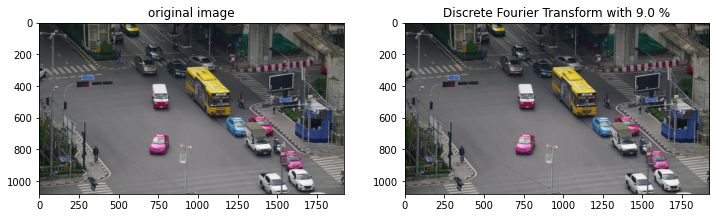

In [5]:
#show
Areco=cv2.cvtColor(merged.astype('uint8'),cv2.COLOR_BGR2RGB)
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fig=plt.figure(figsize=(12, 12))
fig.add_subplot(1, 2, 1).set_title("original image")
plt.imshow(image_rgb)
fig.add_subplot(1, 2, 2).set_title(f"Discrete Fourier Transform with {keep*100} %")
plt.imshow(Areco)
#fig.savefig("fft0.2.png")

In [6]:

from math import log10
def PSNR(original, compressed):
    diff=(original-compressed)
    mse=np.mean((original-compressed)**2)
    max_pixel=255
    psnr=20*log10(max_pixel/((mse)**(1/2)))
    return psnr
    



In [7]:
x=PSNR(image_rgb,Areco)
print(x)


35.0340277775237


In [106]:
def tobin(img):
    im_gray =cv2.cvtColor(img.astype("uint8"),cv2.COLOR_BGR2GRAY)
   
    (thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    cv2.imwrite('bw_img.png', im_bw)

In [107]:
tobin(merged)

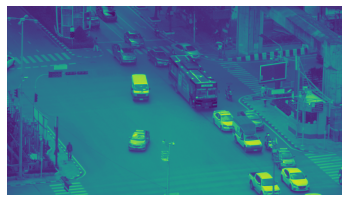

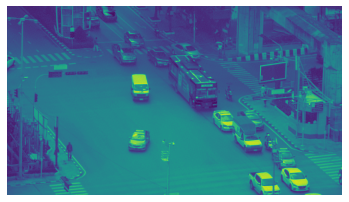

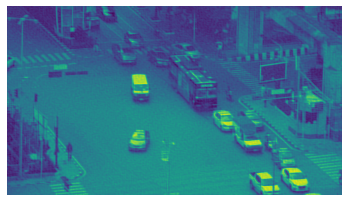

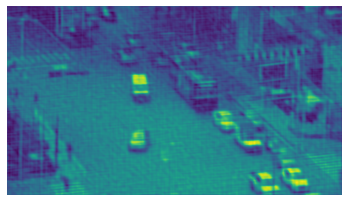

In [78]:
Bt=np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) #sort by magnitude
for keep in (0.1,0.05,0.01,0.002):
    thresh=Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh
    Atlow=Bt*ind
    Alow=np.fft.ifft2(Atlow).real
    plt.figure()
    plt.imshow(Alow)
    plt.axis('off')
    

In [7]:
Alow

array([[ 19.21996089,  19.46678124,  20.98972481, ...,  29.80584506,
         33.09838281,  31.14835642],
       [ 16.64509977,  16.29614189,  18.28363084, ...,  27.27715244,
         30.32681836,  28.68404282],
       [ 19.88190928,  18.57384987,  20.07668468, ...,  29.07903189,
         32.3196901 ,  31.61189673],
       ...,
       [ 79.12439988,  77.26441641,  75.6133429 , ...,  93.5800786 ,
         96.84014901,  93.24646352],
       [ 78.34967282,  77.06040341,  75.68679385, ...,  94.2715673 ,
         96.41768061,  92.29628413],
       [ 84.37390537,  84.00887849,  84.30469536, ...,  98.51004863,
        100.80708477,  97.44597302]])